In [1]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
supercoiling_correlation_file = "/Users/annasintsova/Downloads/gb-2004-5-11-r87-s2.xls"
data_set = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/media_de_genes_DSeq2_norm_counts.csv"


In [2]:
sc = (pd.read_excel(supercoiling_correlation_file, header=1)[["NAME", "bnumber", "correl_supercoiling", "p-value"]]
     .set_index(["bnumber"]))
sc.head()

,NAME,correl_supercoiling,p-value
bnumber,,,
b0001,thrL,-0.316352,1.000000
b0002,thrA,-0.744286,0.003125
b0003,thrB,-0.367227,0.999375
b0004,thrC,-0.282582,1.000000
b0005,b0005,0.097336,1.000000


In [3]:
df = pd.read_csv(data_set, index_col=0)


In [4]:
neg_sc = sc[(sc.correl_supercoiling < 0) & (sc["p-value"] < 0.05)]
neg_sc.head()

,NAME,correl_supercoiling,p-value
bnumber,,,
b0002,thrA,-0.744286,0.003125
b0021,insB_1,-0.695614,0.000875
b0025,ribF,-0.874500,0.000125
b0026,ileS,-0.874419,0.000125
b0027,lspA,-0.749194,0.002000


In [5]:
df2 = pd.merge(neg_sc, df, how="inner", left_index=True, right_index=True)
df2.head()


,NAME,correl_supercoiling,p-value,HM01_UR,HM01_UTI,HM03_UR,HM03_UTI,HM06_UR,HM06_UTI,HM07_UR,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
b0002,thrA,-0.744286,0.003125,1808.315745,764.868752,1488.737967,719.194034,1034.864108,753.729796,1889.313580,...,954.432295,532.747547,3162.882989,786.750433,947.293022,937.603944,8341.492150,554.404849,1705.347401,1487.268019
b0025,ribF,-0.874500,0.000125,3474.115650,3439.646457,2772.570464,2686.594126,3241.351158,3522.087268,2809.796610,...,2678.555509,3069.261988,2465.205157,2434.673639,2456.238833,2216.154777,2674.898825,3168.507711,3257.663627,2689.848683
b0026,ileS,-0.874419,0.000125,3683.606147,6200.415323,2372.085186,5146.937242,4247.306894,6604.108692,3192.547797,...,4344.339340,4349.446392,4969.010160,3210.792309,4805.096002,3494.705610,4528.714980,4243.717115,5152.549639,6236.312680
b0027,lspA,-0.749194,0.002000,275.686380,488.791865,430.016535,955.282045,331.890342,699.111695,321.510997,...,646.011427,675.873754,747.223905,595.378706,575.659092,596.657055,546.821322,588.005143,593.620928,681.717701
b0103,yacE,-0.777776,0.000125,750.349793,823.704809,711.340605,672.195032,668.784057,450.989464,712.320104,...,598.173134,620.213562,457.436993,648.537519,676.971357,1022.840666,403.225430,641.765613,750.652917,776.187945


In [6]:
df3 = np.log2(df2.T[3:].astype("float")+1)
df3["treat"] = ["UR"]*14 + ["UTI"]*14
df3.shape

(28, 156)

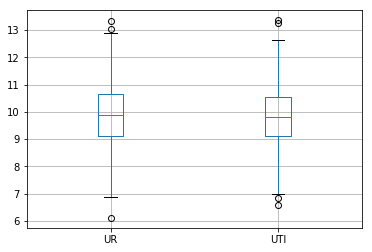

In [10]:
df3.groupby(["treat"]).mean().T.boxplot();

In [12]:
pos_sc = sc[(sc.correl_supercoiling > 0) & (sc["p-value"] < 0.05)]
pos_sc.head()

,NAME,correl_supercoiling,p-value
bnumber,,,
b0011,b0011,0.738342,0.021375
b0012,htgA,0.705940,0.035500
b0019,nhaA,0.678516,0.000875
b0035,caiE,0.759286,0.001125
b0041,fixA,0.826582,0.000125


In [13]:
df4 = pd.merge(pos_sc, df, how="inner", left_index=True, right_index=True)
df4.head()


,NAME,correl_supercoiling,p-value,HM01_UR,HM01_UTI,HM03_UR,HM03_UTI,HM06_UR,HM06_UTI,HM07_UR,...,HM57_UR,HM57_UTI,HM60_UR,HM60_UTI,HM66_UR,HM66_UTI,HM68_UR,HM68_UTI,HM86_UR,HM86_UTI
b0011,b0011,0.738342,0.021375,34.266104,52.047282,35.230270,90.719004,14.454186,63.981204,29.277108,...,15.557169,47.708736,23.620802,95.685864,14.473181,85.236722,13.951260,26.880235,11.502343,12.766249
b0019,nhaA,0.678516,0.000875,506.203805,1776.396361,939.819270,1242.741058,473.930514,475.957739,1361.519837,...,626.564967,858.757240,180.324659,202.003490,596.668547,426.183611,442.697287,621.605436,381.077630,722.569698
b0035,caiE,0.759286,0.001125,69.310982,31.680954,48.182576,50.278002,21.681279,14.044655,51.302089,...,49.782940,87.466015,134.811406,10.631763,48.088310,85.236722,10.208239,26.880235,40.508252,20.425999
b0041,fixA,0.826582,0.000125,47.505280,27.155104,36.266455,18.581001,38.359185,31.210344,26.591135,...,21.780036,111.320383,31.110324,127.581151,39.217651,85.236722,20.416477,50.400441,31.506418,26.809123
b0042,fixB,0.760232,0.001875,47.894668,9.051701,26.681749,26.232001,28.352441,53.057584,11.818282,...,18.668602,55.660191,21.316333,95.685864,25.678224,85.236722,17.694280,23.520206,25.005094,15.319499


In [14]:
df5 = np.log2(df4.T[3:].astype("float")+1)
df5["treat"] = ["UR"]*14 + ["UTI"]*14
df5.shape

(28, 56)

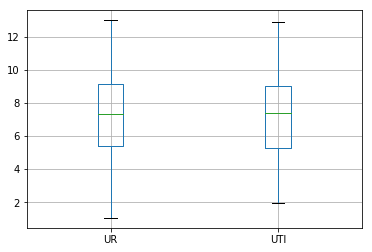

In [15]:
df5.groupby(["treat"]).mean().T.boxplot();